#  Lab 1



##  Hand-Written Digit Recognition

In [1]:
# core
import numpy as np
import pandas as df
import matplotlib.pyplot as plt

# estimator algos
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# metrics & preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split

# data
from sklearn.datasets import load_digits


<h1>Import Digits Data</h1>

In [2]:
digits = load_digits()

<h1>See what they look like</h1>

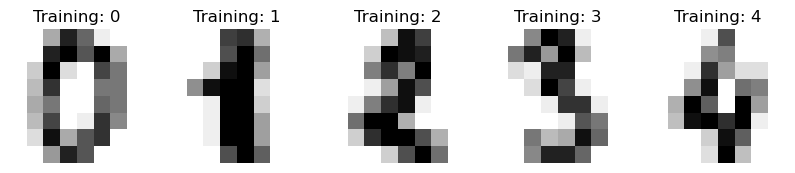

In [3]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

<h1>Question 0</h1>

Split the digits.data and digits.target into train and test data. Create a dummy classifier for the digits data, with a strategy of "most_frequent", and print the score on test data. 

In [6]:
(
    X_train, 
    X_test, 
    y_train, 
    y_test
) = train_test_split(
    digits.data, 
    digits.target, 
    test_size=0.25, 
    random_state=0
)

In [7]:
dummy_clf = (
    DummyClassifier(
        strategy='most_frequent', 
        random_state=0
    )
    .fit(X_train, y_train)
)

In [11]:
unique, counts = np.unique(y_train, return_counts=True)
value_counts = np.asarray((unique, counts)).T
value_counts[value_counts[:, 1].argsort()] 
# .. which means that the predicted class will be 4

array([[  8, 126],
       [  6, 129],
       [  7, 131],
       [  2, 133],
       [  9, 133],
       [  5, 134],
       [  3, 138],
       [  1, 139],
       [  0, 141],
       [  4, 143]])

Prediction = [4]


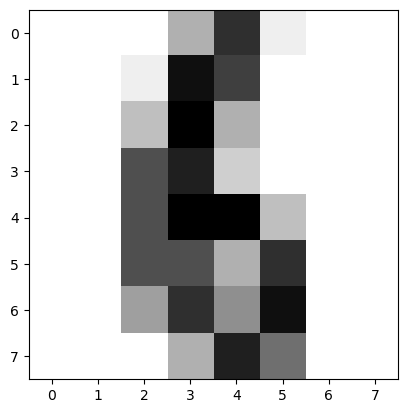

In [23]:
def plot_predict(clf : object, _instance : np.array):
    print("Prediction =", clf.predict(_instance))
    plt.imshow(_instance.reshape((8, 8)), cmap=plt.cm.gray_r, interpolation='nearest')

plot_predict(
    dummy_clf, 
    X_train[np.random.randint(X_train.shape[0], size=1), :] # random instance
)

In [24]:
print(
    metrics.classification_report(
        y_test, 
        dummy_clf.predict(X_test), 
        zero_division=0
    )
)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.00      0.00      0.00        43
           2       0.00      0.00      0.00        44
           3       0.00      0.00      0.00        45
           4       0.08      1.00      0.16        38
           5       0.00      0.00      0.00        48
           6       0.00      0.00      0.00        52
           7       0.00      0.00      0.00        48
           8       0.00      0.00      0.00        48
           9       0.00      0.00      0.00        47

    accuracy                           0.08       450
   macro avg       0.01      0.10      0.02       450
weighted avg       0.01      0.08      0.01       450



<h1>Question 1</h1>
Create a logistic regression model for the digits data and print the score on test data. Use metrics.classification_report to give a more detailed report of results.

In [26]:
preds = LogisticRegression(
    random_state=0, 
    max_iter=10_000,
    multi_class='auto'
).fit(X_train, y_train).predict(X_test)

In [27]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      0.93      0.95        44
           3       0.92      0.98      0.95        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       0.98      0.98      0.98        52
           7       0.98      0.96      0.97        48
           8       0.90      0.90      0.90        48
           9       0.94      0.94      0.94        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



<h1>Question 2</h1>
Create a 3-way split of the data, using train_test_split. First split into trainval and test, and then split trainval into train and val. 

In [28]:
(
    X_trainval, 
    X_test, 
    y_trainval, 
    y_test
) = train_test_split(
    digits.data,
    digits.target,
    test_size=0.20,
    random_state=0
)

In [29]:
(
    X_train,
    X_val,
    y_train,
    y_val
) = train_test_split(
    X_trainval,
    y_trainval,
    test_size=0.20,
    random_state=0
)

<h1>Question 3</h1>
Create a logistic regression classifier for the digits data. Write a loop that tries at least 4 values ranging from .001 to 1.0 for C. Use the val data to determine the best value. Then train on the combined train and val data, and score the resulting model on test. Use metrics.ConfusionMatrixDisplay.from_predictions to display a confusion matrix for all 10 classes. 

In [32]:
train_accs, val_accs, c_ = [], [], []

for i in (10**-i_ for i_ in range(4)):
    lr_clf = LogisticRegression(C=i, max_iter=10000).fit(X_train, y_train)
    
    train_acc = metrics.accuracy_score(y_train, lr_clf.predict(X_train))
    print(f"C={i}, Train accuracy={train_acc}")
    train_accs.append(train_acc)

    val_acc = metrics.accuracy_score(y_val, lr_clf.predict(X_val))
    print(f"C={i}, Validation accuracy={val_acc}\n")
    val_accs.append(val_acc)

    c_.append(i)

C=1, Train accuracy=1.0
C=1, Validation accuracy=0.9722222222222222

C=0.1, Train accuracy=1.0
C=0.1, Validation accuracy=0.9756944444444444

C=0.01, Train accuracy=0.9947780678851175
C=0.01, Validation accuracy=0.9826388888888888

C=0.001, Train accuracy=0.9660574412532638
C=0.001, Validation accuracy=0.96875



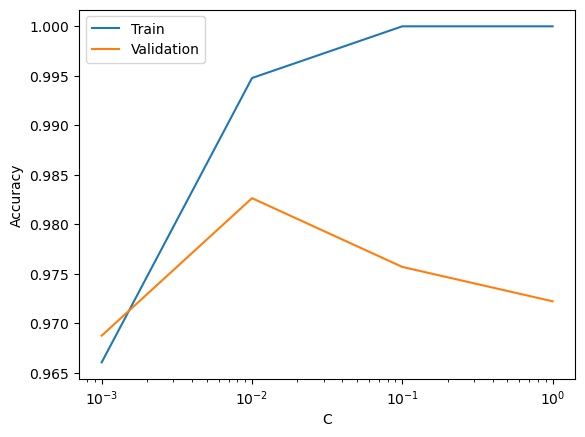

In [33]:
# Plot the accuracy of the model on the training and validation sets (y axus) with respect to the regularization parameter c in list c_ (x axis)
plt.plot(c_, train_accs, label='Train')
plt.plot(c_, val_accs, label='Validation')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()

In [34]:
y_pred = (
    LogisticRegression(C=0.01, max_iter=10000)
    .fit(X_trainval, y_trainval)
    .predict(X_test)
)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.91      0.91      0.91        35
           2       0.97      1.00      0.99        36
           3       1.00      1.00      1.00        29
           4       0.94      0.97      0.95        30
           5       0.97      0.95      0.96        40
           6       0.98      0.98      0.98        44
           7       0.97      0.95      0.96        39
           8       0.95      0.92      0.94        39
           9       0.93      0.95      0.94        41

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



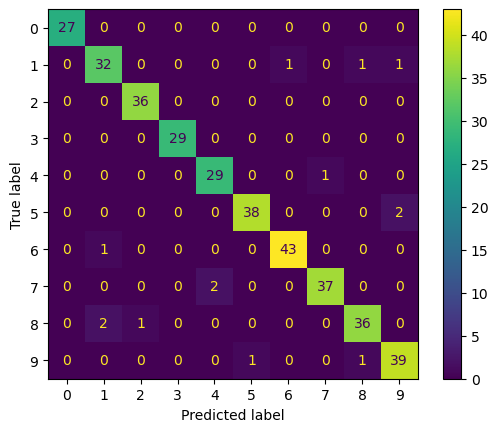

In [35]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))

<h1>Question 4</h1>
Create a Decision Tree classifier for the digits data. Write a loop that tries values of 1 through 20 for maximum depth. Use the val data to determine the best value. 

In [38]:
train_accs, val_accs = [], []
for i in range(1, 20):

    dt_clf = DecisionTreeClassifier(max_depth=i).fit(X_train, y_train)

    train_acc = metrics.accuracy_score(y_train, dt_clf.predict(X_train))
    print(f"Max depth={i}, Train accuracy={train_acc}")
    train_accs.append(train_acc)

    val_acc = metrics.accuracy_score(y_val, dt_clf.predict(X_val))
    print(f"Max depth={i}, Validation accuracy={val_acc}\n")
    val_accs.append(val_acc)

    

Max depth=1, Train accuracy=0.20887728459530025
Max depth=1, Validation accuracy=0.20833333333333334

Max depth=2, Train accuracy=0.3307223672758921
Max depth=2, Validation accuracy=0.28125

Max depth=3, Train accuracy=0.4934725848563969
Max depth=3, Validation accuracy=0.4513888888888889

Max depth=4, Train accuracy=0.6118363794604004
Max depth=4, Validation accuracy=0.5486111111111112

Max depth=5, Train accuracy=0.7580504786771105
Max depth=5, Validation accuracy=0.7152777777777778

Max depth=6, Train accuracy=0.835509138381201
Max depth=6, Validation accuracy=0.7430555555555556

Max depth=7, Train accuracy=0.9042645778938208
Max depth=7, Validation accuracy=0.8020833333333334

Max depth=8, Train accuracy=0.9329852045256745
Max depth=8, Validation accuracy=0.8368055555555556

Max depth=9, Train accuracy=0.9634464751958225
Max depth=9, Validation accuracy=0.8333333333333334

Max depth=10, Train accuracy=0.9773716275021758
Max depth=10, Validation accuracy=0.8368055555555556

Max dept

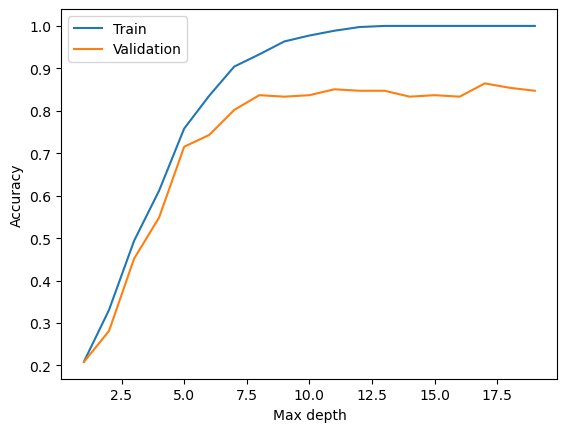

In [40]:
plt.plot(range(1, 20), train_accs, label='Train')
plt.plot(range(1, 20), val_accs, label='Validation')
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.legend();

<h1>Question 5</h1>
Now train the best decision tree model on the combined train and val data, and score the resulting model on test.  
Use both metrics.classification_report and metrics.ConfusionMatrixDisplay.from_predictions to display the results in detail.


In [41]:
dt_clff = DecisionTreeClassifier(max_depth=17).fit(X_trainval, y_trainval)
y_pred = dt_clff.predict(X_test)

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.86      0.89      0.87        35
           2       0.89      0.86      0.87        36
           3       0.72      0.90      0.80        29
           4       0.93      0.90      0.92        30
           5       0.89      0.85      0.87        40
           6       0.93      0.93      0.93        44
           7       0.93      0.97      0.95        39
           8       0.90      0.69      0.78        39
           9       0.79      0.83      0.81        41

    accuracy                           0.87       360
   macro avg       0.87      0.87      0.86       360
weighted avg       0.87      0.87      0.87       360



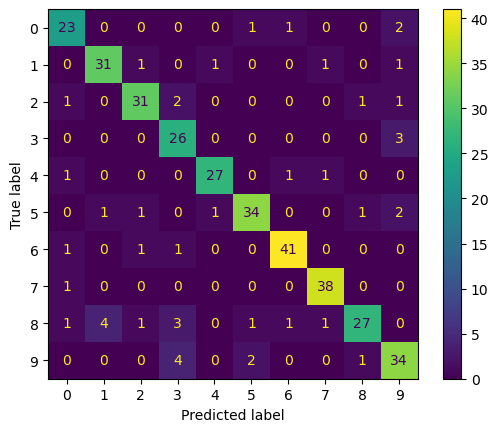

In [42]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))

<h1>Question 6</h1>
Create a Random Forest classifier for the digits data. Use the val data to determine the best values for 
<ul>
    <li>number of estimators (from 50 to 500 by 50s)</li>
    <li>Max depth (from 10 to 50 by 10s)</li>
    </ul>
        

In [43]:
for n_estimators in range(50, 500, 50):
    for max_depth in range(10, 50, 10):

        rf_clf = RandomForestClassifier(n_estimators=100, max_depth=16).fit(X_train, y_train)

        train_acc = rf_clf.score(X_train, y_train)
        print(f"n_estimators={n_estimators}, max_depth={max_depth}, Train accuracy={train_acc}")

        val_acc = rf_clf.score(X_val, y_val)
        print(f"n_estimators={n_estimators}, max_depth={max_depth}, Validation accuracy={val_acc}\n")


n_estimators=50, max_depth=10, Train accuracy=1.0
n_estimators=50, max_depth=10, Validation accuracy=0.9826388888888888

n_estimators=50, max_depth=20, Train accuracy=1.0
n_estimators=50, max_depth=20, Validation accuracy=0.9895833333333334

n_estimators=50, max_depth=30, Train accuracy=1.0
n_estimators=50, max_depth=30, Validation accuracy=0.9791666666666666

n_estimators=50, max_depth=40, Train accuracy=1.0
n_estimators=50, max_depth=40, Validation accuracy=0.9756944444444444

n_estimators=100, max_depth=10, Train accuracy=1.0
n_estimators=100, max_depth=10, Validation accuracy=0.9861111111111112

n_estimators=100, max_depth=20, Train accuracy=1.0
n_estimators=100, max_depth=20, Validation accuracy=0.9895833333333334

n_estimators=100, max_depth=30, Train accuracy=1.0
n_estimators=100, max_depth=30, Validation accuracy=0.9895833333333334

n_estimators=100, max_depth=40, Train accuracy=1.0
n_estimators=100, max_depth=40, Validation accuracy=0.9930555555555556

n_estimators=150, max_de

<h1>Question 7</h1>
Now train the best random forest model on the combined train and val data, and score the resulting model on test.  

Use both metrics.classification_report and metrics.ConfusionMatrixDisplay.from_predictions to display the results in detail.

In [44]:
rf_clf = RandomForestClassifier(n_estimators=450, max_depth=20).fit(X_trainval, y_trainval)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.97      0.97      0.97        35
           2       1.00      0.94      0.97        36
           3       0.94      1.00      0.97        29
           4       1.00      0.97      0.98        30
           5       0.95      0.95      0.95        40
           6       1.00      1.00      1.00        44
           7       0.95      1.00      0.97        39
           8       1.00      0.92      0.96        39
           9       0.95      0.98      0.96        41

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



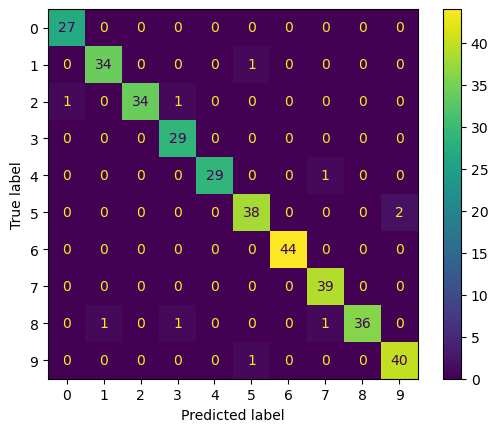

In [46]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, rf_clf.predict(X_test))
print(metrics.classification_report(y_test, rf_clf.predict(X_test)))

# <h1>Question 8</h1>
Create a MLP classifier for the digits data. Use the val data to determine the best values for 
hidden layer sizes. Try values from (10,10) to (210,210), increasing by 50s. You can use two nested loops for variables H1 and H2, and then assign (H1,H2) to the parameter hidden_layer_sizes.
<p> Print the best values for the two hidden layer sizes</p>
    
        

In [47]:
for h1 in range(10, 210, 50):
    for h2 in range(10, 210, 50):
        mlp_clf = MLPClassifier(hidden_layer_sizes=(h1, h2), max_iter=1000).fit(X_train, y_train)
        print(f"Hidden layer sizes={h1, h2}, Train accuracy={metrics.accuracy_score(y_train, mlp_clf.predict(X_train))}")
        print(f"Hidden layer sizes={h1, h2}, Validation accuracy={metrics.accuracy_score(y_val, mlp_clf.predict(X_val))}\n")

Hidden layer sizes=(10, 10), Train accuracy=1.0
Hidden layer sizes=(10, 10), Validation accuracy=0.9479166666666666

Hidden layer sizes=(10, 60), Train accuracy=1.0
Hidden layer sizes=(10, 60), Validation accuracy=0.9652777777777778

Hidden layer sizes=(10, 110), Train accuracy=1.0
Hidden layer sizes=(10, 110), Validation accuracy=0.9722222222222222

Hidden layer sizes=(10, 160), Train accuracy=1.0
Hidden layer sizes=(10, 160), Validation accuracy=0.9756944444444444

Hidden layer sizes=(60, 10), Train accuracy=1.0
Hidden layer sizes=(60, 10), Validation accuracy=0.9652777777777778

Hidden layer sizes=(60, 60), Train accuracy=1.0
Hidden layer sizes=(60, 60), Validation accuracy=0.9791666666666666

Hidden layer sizes=(60, 110), Train accuracy=1.0
Hidden layer sizes=(60, 110), Validation accuracy=0.9861111111111112

Hidden layer sizes=(60, 160), Train accuracy=1.0
Hidden layer sizes=(60, 160), Validation accuracy=0.9895833333333334

Hidden layer sizes=(110, 10), Train accuracy=1.0
Hidden 

<h1>Question 9</h1>

Now train the best mlp model on the combined train and val data, and score the resulting model on test.  

Use both metrics.classification_report and metrics.ConfusionMatrixDisplay.from_predictions to display the results in detail.

In [48]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(160, 110), max_iter=1000).fit(X_trainval, y_trainval)
y_pred = mlp_clf.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.94      0.97      0.96        35
           2       0.97      0.97      0.97        36
           3       1.00      0.97      0.98        29
           4       1.00      0.97      0.98        30
           5       0.95      0.97      0.96        40
           6       1.00      0.98      0.99        44
           7       0.93      0.97      0.95        39
           8       0.95      0.95      0.95        39
           9       0.97      0.95      0.96        41

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



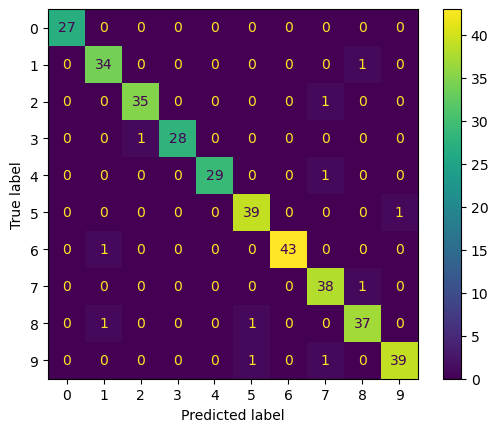

In [49]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))

Prediction = [6]


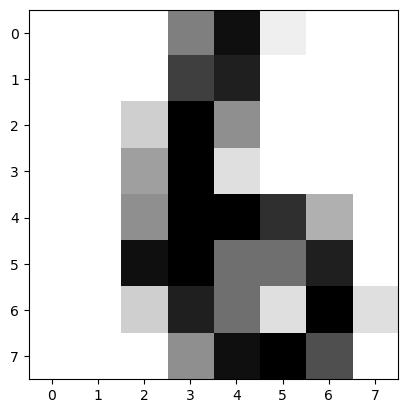

In [51]:
def plot_predict(clf : object, _instance : np.array):
    print("Prediction =", clf.predict(_instance))
    plt.imshow(_instance.reshape((8, 8)), cmap=plt.cm.gray_r, interpolation='nearest')

plot_predict(
    mlp_clf, 
    X_train[np.random.randint(X_test.shape[0], size=1), :] # random instance
)